In [33]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [148]:
ds=pd.read_csv('../train.csv')
ds.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
mean_01=np.array([0.,0.])
cov_01=np.array([[1.0,1.2],[1.2,1.5]])

data=np.random.multivariate_normal(mean_01,cov_01,800)
print data.shape

(800, 2)


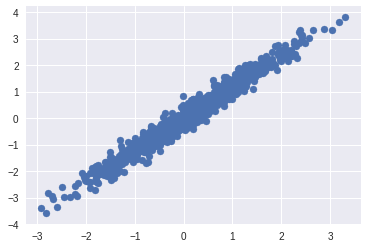

In [35]:
plt.figure(0)
sns.plt.scatter(data[:,0],data[:,1])

In [172]:
def pca(X,k=None):
    # Set number of output dims
    if k is None :
        k=X.shape[1]
    # compute the covariance
    A=np.cov(X.T)
    
    
    #compute the eigenvectors and eigenvalues
    eig_val,eig_vec=np.linalg.eig(A)
    return eig_val,eig_vec
    #

In [173]:
lam,W=pca(data)
print lam.shape,W.shape
print lam
print W

(784,) (784, 784)
[  3.33627106e+05 +0.00000000e+00j   2.48191899e+05 +0.00000000e+00j
   2.13545883e+05 +0.00000000e+00j   1.86764929e+05 +0.00000000e+00j
   1.65983397e+05 +0.00000000e+00j   1.47394632e+05 +0.00000000e+00j
   1.10595484e+05 +0.00000000e+00j   9.89259638e+04 +0.00000000e+00j
   9.71107833e+04 +0.00000000e+00j   8.10194350e+04 +0.00000000e+00j
   7.27244253e+04 +0.00000000e+00j   6.99574615e+04 +0.00000000e+00j
   5.98372787e+04 +0.00000000e+00j   5.86954002e+04 +0.00000000e+00j
   5.48357446e+04 +0.00000000e+00j   5.04268902e+04 +0.00000000e+00j
   4.54872105e+04 +0.00000000e+00j   4.50357989e+04 +0.00000000e+00j
   4.03452618e+04 +0.00000000e+00j   4.02603093e+04 +0.00000000e+00j
   3.77446013e+04 +0.00000000e+00j   3.56749176e+04 +0.00000000e+00j
   3.35866749e+04 +0.00000000e+00j   3.16029888e+04 +0.00000000e+00j
   3.06558288e+04 +0.00000000e+00j   2.90509901e+04 +0.00000000e+00j
   2.83798715e+04 +0.00000000e+00j   2.68952258e+04 +0.00000000e+00j
   2.54145224e+0

In [174]:
Z=data.dot(w)

ValueError: shapes (10000,784) and (785,785) not aligned: 784 (dim 1) != 785 (dim 0)

[[  3.34780807e+05+0.j  -2.25673703e-10+0.j  -3.88226624e-11+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [ -2.25673703e-10+0.j   2.45887077e+05+0.j   7.48285959e-11+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [ -3.88226624e-11+0.j   7.48285959e-11+0.j   2.11051680e+05+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 ..., 
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j ...,
    0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]]


TypeError: unhashable type

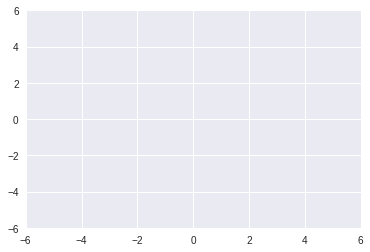

In [175]:
print np.cov(Z.T)
plt.figure(0)
plt.xlim(-6,6)
plt.ylim(-6,6)
sns.plt.scatter(Z[:,0],Z[:,1])
plt.show()

In [189]:
lam,w=pca(ds)
print lam.shape,w.shape
Z=ds.dot(w)
lam.sort()
count=0
print lam
acc=np.cumsum(lam/lam.sum())
print acc

(785,) (785, 785)
[ -3.27578543e-14 -3.31155949e-13j  -3.27578543e-14 +3.31155949e-13j
  -7.34393780e-16 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j
   0.00000000e+0

In [186]:
count=0
for ix in range(len(acc)):
    if(acc[ix]<=0.995):
        count+=1
    else:
        break
print count

784


In [168]:
print acc[78]

(0.889703631337+0j)


In [107]:
split=int(0.75*ds.shape[0])
X=ds[ds.columns[1:]]
Y=ds[ds.columns[:1]]
KNeighborsClassifier(n_neighbors=8).fit(X[:split],Y[:split]).score(X[split:],Y[split:])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.88600000000000001

In [110]:
from sklearn.neighbors import KNeighborsClassifier
X=ds[ds.columns[1:count]]
Y=ds[ds.columns[:1]]
print ds.shape, X.shape, Y.shape

(2000, 785) (2000, 329) (2000, 1)


In [109]:
split=int(0.75*ds.shape[0])
KNeighborsClassifier(n_neighbors=8).fit(X[:split],Y[:split]).score(X[split:],Y[split:])


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.74399999999999999

In [142]:
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=78)
data = ds.values[:10000, 1:]
X_=pca.fit_transform(data)

In [166]:
X_re=pca.inverse_transform(X_)
X_re.shape

(10000, 784)

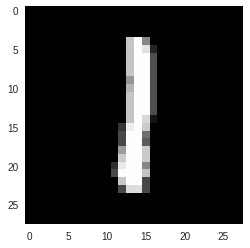

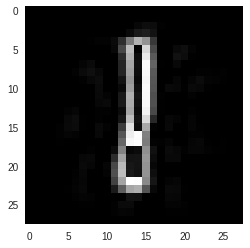

In [170]:
N=41
plt.figure(0)
plt.grid("off")
plt.imshow(data[N].reshape((28,28)),cmap='gray')
plt.figure(1)
plt.grid("off")
im=(X_re[N]>0) * X_re[N]
plt.imshow(np.asarray(im.reshape((28,28)),dtype='uint8'),cmap='gray')